In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline
color = sns.color_palette()

In [7]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
order_canceled = df['InvoiceNo'].apply(lambda x:int('C' in x))
n1 = order_canceled.sum()
n2 = df.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/541909 (1.71%) 


In [9]:
print (((df['Quantity'] <= 0) | (df['UnitPrice'] < 0)).value_counts()) 
df = df.loc[(df['Quantity'] > 0) | (df['UnitPrice'] >= 0)]

False    531283
True      10626
dtype: int64


<AxesSubplot:title={'center':'Frequency of order by Month'}>

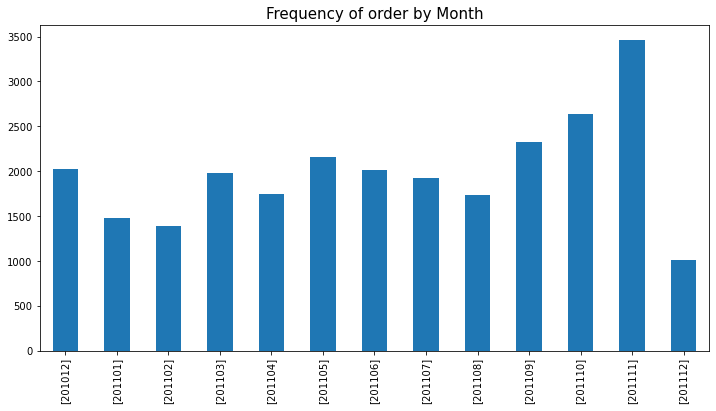

In [12]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['yearmonth'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

<AxesSubplot:title={'center':'Frequency of order by Week'}>

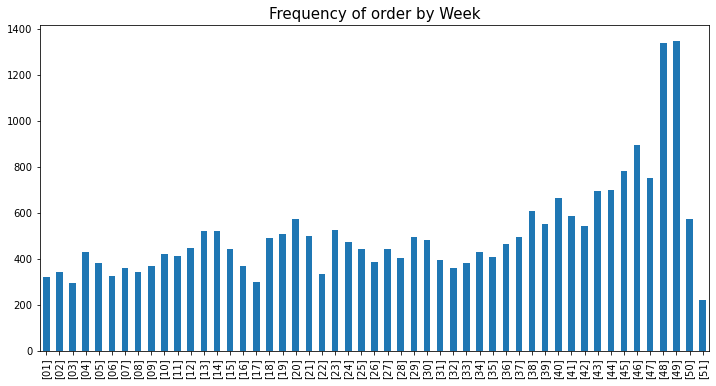

In [13]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Week'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

<AxesSubplot:title={'center':'Frequency of order by Day'}>

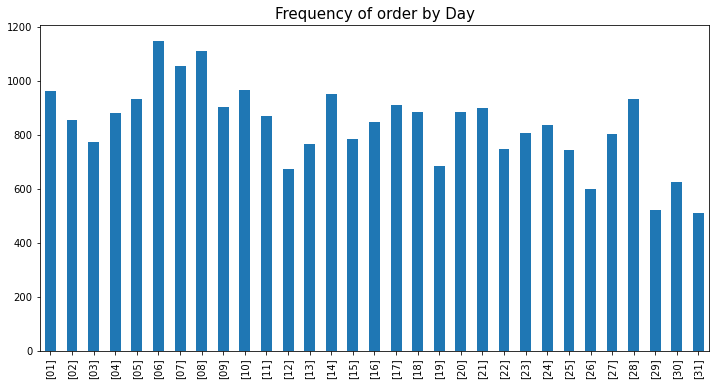

In [14]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

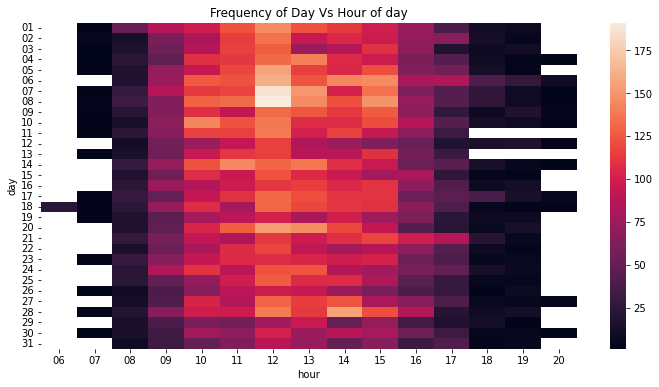

In [15]:
grouped_df  = df.groupby(["day", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)
grouped_df = grouped_df.pivot('day', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

<AxesSubplot:title={'center':'Frequency of order by Weekday'}>

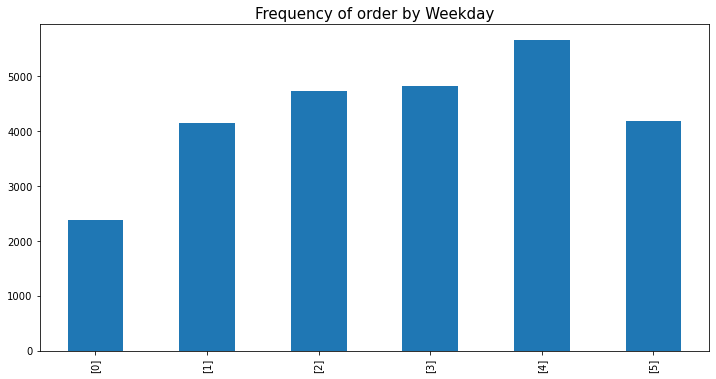

In [16]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

<AxesSubplot:title={'center':'Frequency of order by hour of day'}>

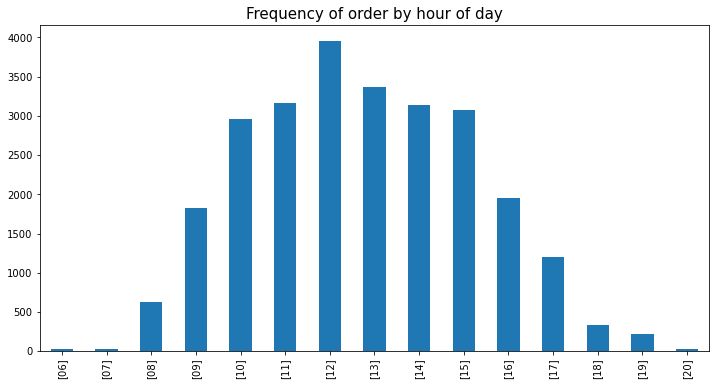

In [17]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
InvoiceDate = df.groupby(['InvoiceNo'])['hour'].unique()
(InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar()

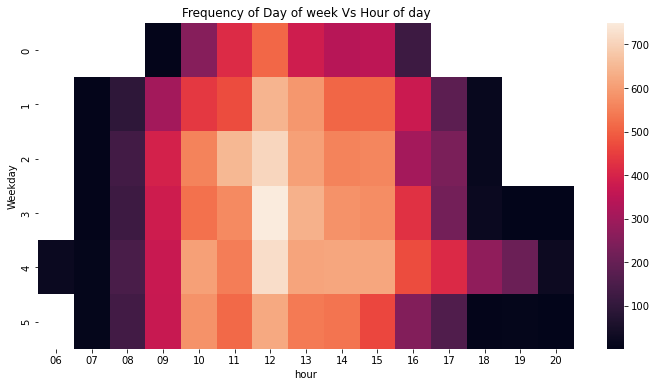

In [18]:
grouped_df  = df.groupby(["Weekday", "hour"])["InvoiceNo"].unique().reset_index()
grouped_df["InvoiceNo"] = grouped_df["InvoiceNo"].apply(len)

#gro
grouped_df = grouped_df.pivot('Weekday', 'hour', 'InvoiceNo')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [11]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")

#remove the negative values and replace with nan
df.loc[df['Quantity'] <= 0, 'Quantity'] = np.nan
df.loc[df['UnitPrice'] < 0, 'UnitPrice'] = np.nan

df.dropna(inplace=True)

df['total_dollars'] = df['Quantity']*df['UnitPrice']

df['yearmonth'] = df['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)
df['Week'] = df['InvoiceDate'].apply(lambda x: x.strftime('%W'))
df['day'] = df['InvoiceDate'].apply(lambda x: x.strftime('%d'))
df['Weekday'] = df['InvoiceDate'].apply(lambda x: x.strftime('%w'))
df['hour'] = df['InvoiceDate'].apply(lambda x: x.strftime('%H'))

In [12]:
df_sort = df.sort_values(['CustomerID', 'StockCode', 'InvoiceDate'])
df_sort_shift1 = df_sort.shift(1)
df_sort_reorder = df_sort.copy()
df_sort_reorder['reorder'] = np.where(df_sort['StockCode'] == df_sort_shift1['StockCode'], 1,0)
df_sort_reorder.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_dollars,yearmonth,Week,day,Weekday,hour,reorder
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,201101,03,18,2,10,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24.0,2011-04-07 10:43:00,0.25,12347,Iceland,6.0,201104,14,07,4,10,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36.0,2011-06-09 13:01:00,0.30,12347,Iceland,10.8,201106,23,09,4,13,0
148289,549222,20665,RED RETROSPOT PURSE,6.0,2011-04-07 10:43:00,2.95,12347,Iceland,17.7,201104,14,07,4,10,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10.0,2011-01-26 14:30:00,0.85,12347,Iceland,8.5,201101,04,26,3,14,0


In [13]:
pd.DataFrame((df_sort_reorder.groupby(['Description'])['reorder'].sum())).sort_values('reorder', ascending = False).head(10)

,reorder
Description,
WHITE HANGING HEART T-LIGHT HOLDER,1172
JUMBO BAG RED RETROSPOT,983
REGENCY CAKESTAND 3 TIER,843
LUNCH BAG RED RETROSPOT,785
POSTAGE,768
ASSORTED COLOUR BIRD ORNAMENT,730
PARTY BUNTING,689
LUNCH BAG BLACK SKULL.,647
LUNCH BAG SUKI DESIGN,621


<AxesSubplot:>

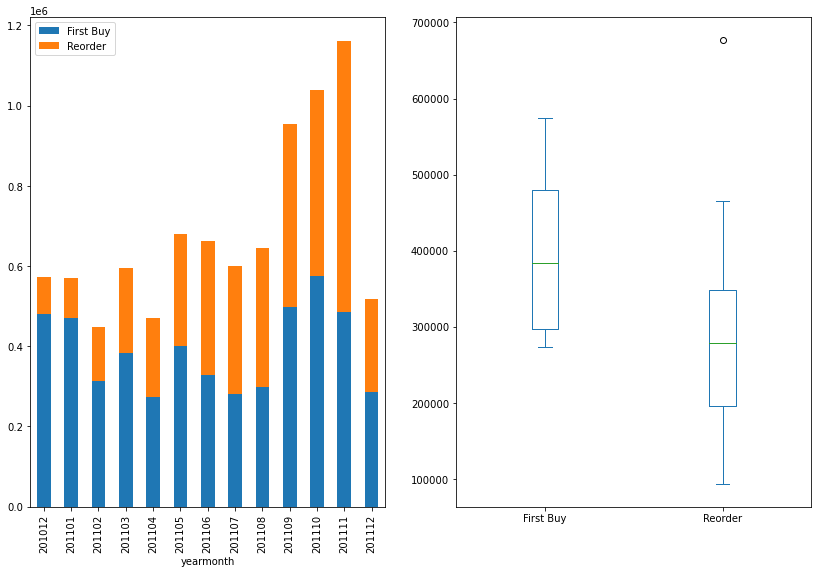

In [14]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['yearmonth'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['yearmonth'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

<AxesSubplot:>

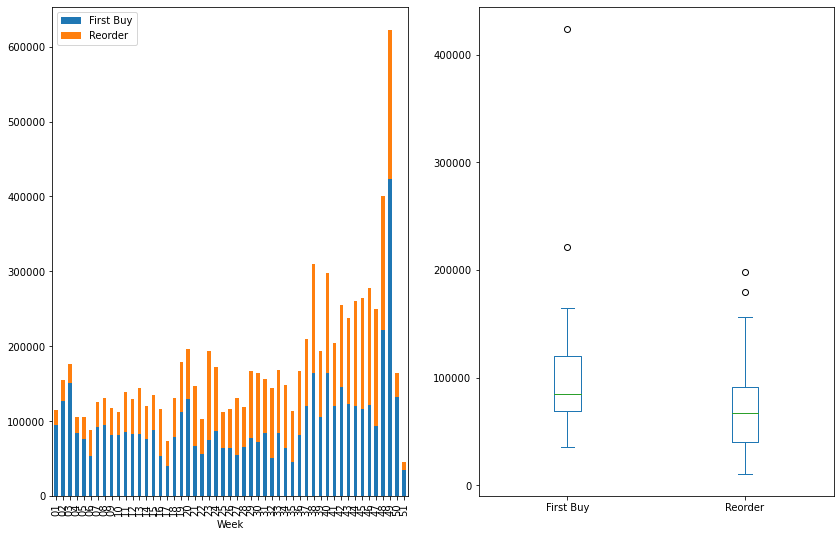

In [15]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['Week'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['Week'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])

<AxesSubplot:>

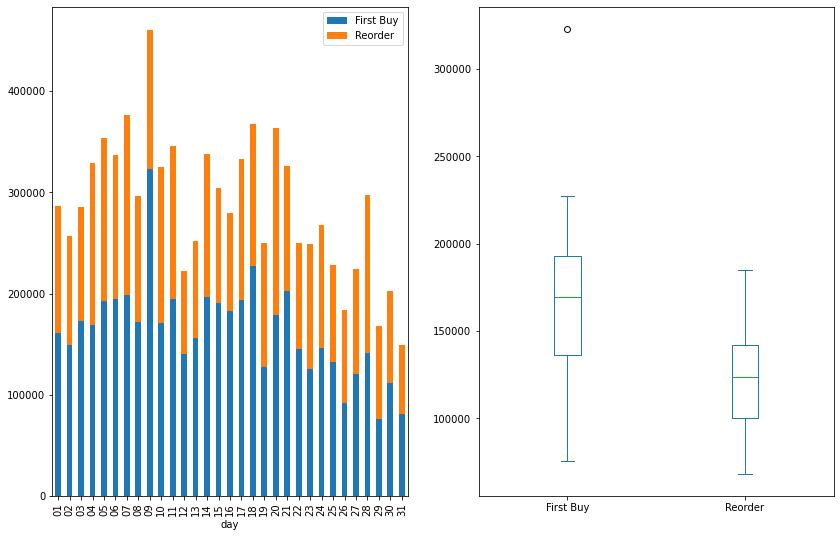

In [16]:
notreorder = (df_sort_reorder[df_sort_reorder['reorder'] == 0 ].groupby(['day'])['total_dollars'].sum())
reorder = (df_sort_reorder[df_sort_reorder['reorder'] == 1 ].groupby(['day'])['total_dollars'].sum())

yearmonth = pd.DataFrame([notreorder , reorder], index=['First Buy', 'Reorder']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))

yearmonth.plot.bar(stacked=True, ax=axes[0])
yearmonth.plot.box(ax=axes[1])